- Environment Setup

In [1]:
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

from wrangle import clean_311

import model

from model import split_separate_scale, dummy_dept, dummy_call_reason, make_source_id_dummies

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire and Prep

In [3]:
# acquire data
df = pd.read_csv('allservicecalls.csv')

In [4]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,2020-05-15T00:00:00,2021-05-15T00:00:00


In [5]:
df.shape

(495440, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

In [7]:
df = clean_311(df)

In [8]:
df = dummy_dept(df)
df = dummy_call_reason(df)
df = make_source_id_dummies(df)

In [9]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df.shape

(356804, 63)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   open_date                   356804 non-null  datetime64[ns]
 1   due_date                    356804 non-null  datetime64[ns]
 2   closed_date                 356804 non-null  datetime64[ns]
 3   is_late                     356804 non-null  object        
 4   dept                        356804 non-null  object        
 5   call_reason                 356804 non-null  object        
 6   case_type                   356804 non-null  object        
 7   case_status                 356804 non-null  object        
 8   source_id                   356804 non-null  object        
 9   address                     356804 non-null  object        
 10  council_district            356804 non-null  int64         
 11  longitude                   356804 no

In [12]:
df.isnull().sum()

open_date                     0
due_date                      0
closed_date                   0
is_late                       0
dept                          0
call_reason                   0
case_type                     0
case_status                   0
source_id                     0
address                       0
council_district              0
longitude                     0
latitude                      0
days_open                     0
resolution_days_due           0
days_before_or_after_due      0
pct_time_of_used              0
level_of_delay                0
district_1                    0
district_2                    0
district_3                    0
district_4                    0
district_5                    0
district_6                    0
district_7                    0
district_8                    0
district_9                    0
district_10                   0
voter_turnout_2019            0
num_of_registered_voters      0
zipcode                       0
open_mon

# Extract Month, Year, and Week from open_date

In [13]:
df['open_month'] = df.open_date.dt.month

In [14]:
df['open_year'] = df.open_date.dt.year

In [15]:
df['open_week'] = df.open_date.dt.week

In [16]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df.open_month.value_counts()

6     36787
4     36524
3     34883
7     34483
5     33693
8     31960
9     26599
10    26014
11    24548
1     23942
12    23894
2     23477
Name: open_month, dtype: int64

In [18]:
df.open_year.value_counts()

2020    232579
2021    119514
2019      3108
2018      1219
2017       384
Name: open_year, dtype: int64

In [19]:
df.open_week.value_counts()

23    8825
24    8696
14    8664
15    8608
18    8463
12    8393
25    8190
16    8090
28    8078
17    8045
29    8023
26    8019
22    7927
11    7806
13    7772
32    7737
33    7727
30    7643
21    7492
10    7479
9     7434
31    7354
34    7267
27    7211
35    7195
8     6838
36    6704
6     6557
47    6319
43    6205
5     6198
38    6194
49    6158
45    6082
37    6000
39    5905
41    5892
4     5864
44    5857
1     5856
42    5819
46    5793
50    5704
51    5604
40    5589
3     5564
2     5519
19    5226
48    4973
20    4806
53    4218
52    4115
7     3107
Name: open_week, dtype: int64

In [20]:
def extract_time(df):
    '''
    This function will take in a dataframe and return it with new features extracted from the open_date column
    - open_month: which month the case was opened in
    - open_year: which year the case was opened in
    - open_week: which week the case was opened in
    '''
    
    # extract month from open_date
    df['open_month'] = df.open_date.dt.month
    
    # extract year from open_date
    df['open_year'] = df.open_date.dt.year
    
    # extract week from open_date
    df['open_week'] = df.open_date.dt.week
    
    return df

In [21]:
# acquire data
test_df = pd.read_csv('allservicecalls.csv')

In [22]:
test_df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,2020-05-15T00:00:00,2021-05-15T00:00:00


In [23]:
test_df = clean_311(test_df)

In [24]:
test_df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

In [26]:
test_df = extract_time(test_df)

In [27]:
test_df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

In [29]:
test_df.open_month.value_counts()

6     36787
4     36524
3     34883
7     34483
5     33693
8     31960
9     26599
10    26014
11    24548
1     23942
12    23894
2     23477
Name: open_month, dtype: int64

In [30]:
test_df.open_year.value_counts()

2020    232579
2021    119514
2019      3108
2018      1219
2017       384
Name: open_year, dtype: int64

In [31]:
test_df.open_week.value_counts()

23    8825
24    8696
14    8664
15    8608
18    8463
12    8393
25    8190
16    8090
28    8078
17    8045
29    8023
26    8019
22    7927
11    7806
13    7772
32    7737
33    7727
30    7643
21    7492
10    7479
9     7434
31    7354
34    7267
27    7211
35    7195
8     6838
36    6704
6     6557
47    6319
43    6205
5     6198
38    6194
49    6158
45    6082
37    6000
39    5905
41    5892
4     5864
44    5857
1     5856
42    5819
46    5793
50    5704
51    5604
40    5589
3     5564
2     5519
19    5226
48    4973
20    4806
53    4218
52    4115
7     3107
Name: open_week, dtype: int64

# Explore

<AxesSubplot:xlabel='open_week'>

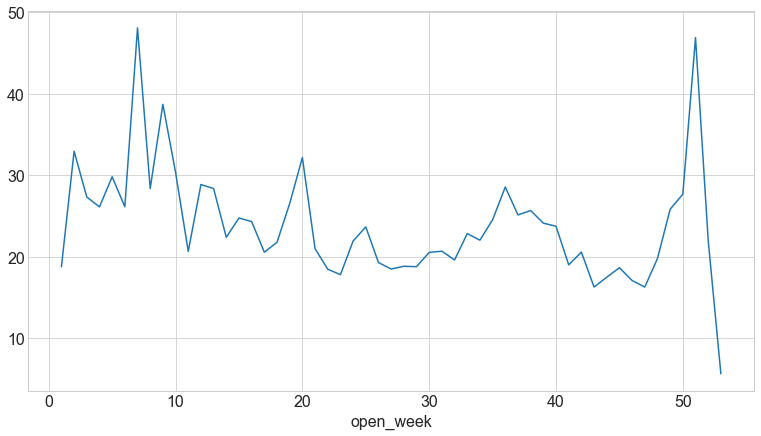

In [32]:
df.groupby('open_week').days_open.mean().plot()

<AxesSubplot:xlabel='open_month'>

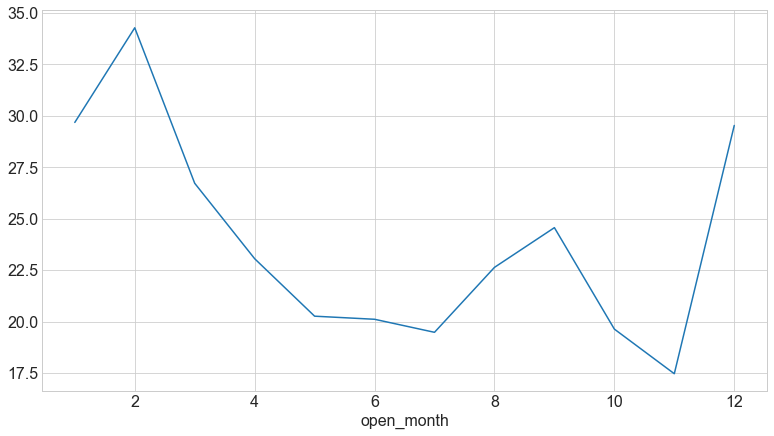

In [33]:
df.groupby('open_month').days_open.mean().plot()

In [34]:
df.groupby('open_month').call_reason.value_counts()

open_month  call_reason     
1           waste               10224
            code                 4989
            field                4558
            misc                 1368
            trades                743
            streets               659
            traffic               556
            customer_service      351
            storm                 188
            land                  120
            license                96
            business               79
            buildings              11
2           waste                8649
            field                6164
            code                 5249
            misc                 1097
            trades                627
            streets               577
            traffic               416
            customer_service      322
            storm                 128
            land                   91
            business               86
            license                56
            buildings

In [35]:
df.groupby('open_month').dept.value_counts()

open_month  dept                     
1           Solid Waste Management       11706
            Development Services          4959
            Animal Care Services          4564
            Trans & Cap Improvements      1385
            Unknown                        868
            Customer Service               182
            Metro Health                   177
            Code Enforcement Services      101
2           Solid Waste Management        9859
            Animal Care Services          6174
            Development Services          5193
            Trans & Cap Improvements      1087
            Unknown                        741
            Customer Service               163
            Metro Health                   143
            Code Enforcement Services      117
3           Solid Waste Management       18444
            Development Services          7960
            Animal Care Services          5249
            Trans & Cap Improvements      1613
            Unknown   

In [36]:
df.groupby('open_month').council_district.value_counts()

open_month  council_district
1           3                   3285
            2                   3279
            1                   3135
            5                   3069
            4                   2326
            7                   2302
            10                  1995
            6                   1965
            9                   1332
            8                   1254
2           5                   3471
            2                   3223
            3                   3086
            1                   3079
            4                   2406
            7                   2185
            6                   1898
            10                  1825
            8                   1183
            9                   1121
3           2                   4484
            5                   4333
            1                   4314
            3                   4211
            7                   3534
            4                   3257
         

In [37]:
df.groupby('open_month').level_of_delay.value_counts()

open_month  level_of_delay     
1           Very Early Response    18030
            Late Response           2057
            Early Response          1778
            On Time Response        1745
            Very Late Response       332
2           Very Early Response    15965
            Late Response           4076
            On Time Response        1377
            Early Response          1184
            Very Late Response       875
3           Very Early Response    24378
            Late Response           3827
            Early Response          3105
            On Time Response        2850
            Very Late Response       723
4           Very Early Response    25462
            Late Response           4043
            Early Response          3214
            On Time Response        3123
            Very Late Response       682
5           Very Early Response    26532
            Early Response          2483
            Late Response           2124
            On Time Respo

In [38]:
df.groupby('open_month').is_late.value_counts()

open_month  is_late
1           NO         20320
            YES         3622
2           NO         17361
            YES         6116
3           NO         28282
            YES         6601
4           NO         29452
            YES         7072
5           NO         29756
            YES         3937
6           NO         32792
            YES         3995
7           NO         31079
            YES         3404
8           NO         28264
            YES         3696
9           NO         22995
            YES         3604
10          NO         22940
            YES         3074
11          NO         21951
            YES         2597
12          NO         20537
            YES         3357
Name: is_late, dtype: int64

In [39]:
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm

In [40]:
import math

from math import sqrt

In [41]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the months a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_month== 1],
        train.days_open[train.open_month== 2],
        train.days_open[train.open_month== 3],
        train.days_open[train.open_month== 4],
        train.days_open[train.open_month== 5],
        train.days_open[train.open_month== 6],
        train.days_open[train.open_month== 7], 
        train.days_open[train.open_month== 8], 
        train.days_open[train.open_month== 9], 
        train.days_open[train.open_month== 10],
        train.days_open[train.open_month== 11],
        train.days_open[train.open_month== 12]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [42]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the months a case is opened in.


In [43]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the year a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_year== 2018],
        train.days_open[train.open_year== 2019],
        train.days_open[train.open_year== 2020],
        train.days_open[train.open_year== 2021]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [44]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the year a case is opened in.


In [45]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the week a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_week== 1],
        train.days_open[train.open_week== 2],
        train.days_open[train.open_week== 3],
        train.days_open[train.open_week== 4],
        train.days_open[train.open_week== 5],
        train.days_open[train.open_week== 6],
        train.days_open[train.open_week== 7], 
        train.days_open[train.open_week== 8], 
        train.days_open[train.open_week== 9], 
        train.days_open[train.open_week== 10],
        train.days_open[train.open_week== 11],
        train.days_open[train.open_week== 12],
        train.days_open[train.open_week== 13],
        train.days_open[train.open_week== 14],
        train.days_open[train.open_week== 15],
        train.days_open[train.open_week== 16],
        train.days_open[train.open_week== 17], 
        train.days_open[train.open_week== 18], 
        train.days_open[train.open_week== 19], 
        train.days_open[train.open_week== 20],
        train.days_open[train.open_week== 21],
        train.days_open[train.open_week== 22],
        train.days_open[train.open_week== 23],
        train.days_open[train.open_week== 24],
        train.days_open[train.open_week== 25],
        train.days_open[train.open_week== 26],
        train.days_open[train.open_week== 27], 
        train.days_open[train.open_week== 28], 
        train.days_open[train.open_week== 29], 
        train.days_open[train.open_week== 30],
        train.days_open[train.open_week== 31],
        train.days_open[train.open_week== 32],
        train.days_open[train.open_week== 33],
        train.days_open[train.open_week== 34],
        train.days_open[train.open_week== 35],
        train.days_open[train.open_week== 36],
        train.days_open[train.open_week== 37], 
        train.days_open[train.open_week== 38], 
        train.days_open[train.open_week== 39], 
        train.days_open[train.open_week== 40],
        train.days_open[train.open_week== 41],
        train.days_open[train.open_week== 42],
        train.days_open[train.open_week== 43],
        train.days_open[train.open_week== 44],
        train.days_open[train.open_week== 45],
        train.days_open[train.open_week== 46],
        train.days_open[train.open_week== 47], 
        train.days_open[train.open_week== 48], 
        train.days_open[train.open_week== 49], 
        train.days_open[train.open_week== 50],
        train.days_open[train.open_week== 51],
        train.days_open[train.open_week== 52],
        train.days_open[train.open_week== 53]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [46]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the week a case is opened in.


In [47]:
H0 = 'there is no difference in days a case is open between month 1 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 1 and the general population'

alpha = .05

month1 = df[df['open_month'] == 1]

μ = df.days_open.mean()
xbar = month1.days_open.mean()
s = month1.days_open.std()
n = month1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.522342819880308
1.6544284870989064e-17
there is a significant difference between the days a case is open between month 1 and the general population


In [48]:
H0 = 'there is no difference in days a case is open between month 2 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 2 and the general population'

alpha = .05

month2 = df[df['open_month'] == 2]

μ = df.days_open.mean()
xbar = month2.days_open.mean()
s = month2.days_open.std()
n = month2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

15.474609514270584
9.490547015508208e-54
there is a significant difference between the days a case is open between month 2 and the general population


In [49]:
H0 = 'there is no difference in days a case is open between month 3 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 3 and the general population'

alpha = .05

month3 = df[df['open_month'] == 3]

μ = df.days_open.mean()
xbar = month3.days_open.mean()
s = month3.days_open.std()
n = month3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

6.073475488213158
1.264629381778907e-09
there is a significant difference between the days a case is open between month 3 and the general population


In [50]:
H0 = 'there is no difference in days a case is open between month 4 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 4 and the general population'

alpha = .05

month4 = df[df['open_month'] == 4]

μ = df.days_open.mean()
xbar = month4.days_open.mean()
s = month4.days_open.std()
n = month4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-1.0932874457690704
1.7257251759946337
there is no difference in days a case is open between month 4 and the rest of the population


In [51]:
H0 = 'there is no difference in days a case is open between month 5 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 5 and the general population'

alpha = .05

month5 = df[df['open_month'] == 5]

μ = df.days_open.mean()
xbar = month5.days_open.mean()
s = month5.days_open.std()
n = month5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-7.33647160242466
1.9999999999997757
there is no difference in days a case is open between month 5 and the rest of the population


In [52]:
H0 = 'there is no difference in days a case is open between month 6 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 6 and the general population'

alpha = .05

month6 = df[df['open_month'] == 6]

μ = df.days_open.mean()
xbar = month6.days_open.mean()
s = month6.days_open.std()
n = month6.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-8.810990753744496
2.0
there is no difference in days a case is open between month 6 and the rest of the population


In [53]:
H0 = 'there is no difference in days a case is open between month 7 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 7 and the general population'

alpha = .05

month7 = df[df['open_month'] == 7]

μ = df.days_open.mean()
xbar = month7.days_open.mean()
s = month7.days_open.std()
n = month7.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.136293007130439
2.0
there is no difference in days a case is open between month 7 and the rest of the population


In [54]:
H0 = 'there is no difference in days a case is open between month 8 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 8 and the general population'

alpha = .05

month8 = df[df['open_month'] == 8]

μ = df.days_open.mean()
xbar = month8.days_open.mean()
s = month8.days_open.std()
n = month8.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-2.100824463307345
1.964335809330585
there is no difference in days a case is open between month 8 and the rest of the population


In [55]:
H0 = 'there is no difference in days a case is open between month 9 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 9 and the general population'

alpha = .05

month9 = df[df['open_month'] == 9]

μ = df.days_open.mean()
xbar = month9.days_open.mean()
s = month9.days_open.std()
n = month9.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

1.957463404487783
0.05030345250035832
there is no difference in days a case is open between month 9 and the rest of the population


In [56]:
H0 = 'there is no difference in days a case is open between month 10 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 10 and the general population'

alpha = .05

month10 = df[df['open_month'] == 10]

μ = df.days_open.mean()
xbar = month10.days_open.mean()
s = month10.days_open.std()
n = month10.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-6.58234908694201
1.9999999999528117
there is no difference in days a case is open between month 10 and the rest of the population


In [57]:
H0 = 'there is no difference in days a case is open between month 11 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 11 and the general population'

alpha = .05

month11 = df[df['open_month'] == 11]

μ = df.days_open.mean()
xbar = month11.days_open.mean()
s = month11.days_open.std()
n = month11.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.783714167135098
2.0
there is no difference in days a case is open between month 11 and the rest of the population


In [58]:
H0 = 'there is no difference in days a case is open between month 12 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 12 and the general population'

alpha = .05

month12 = df[df['open_month'] == 12]

μ = df.days_open.mean()
xbar = month12.days_open.mean()
s = month12.days_open.std()
n = month12.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.373862704257544
5.878317253684033e-17
there is a significant difference between the days a case is open between month 12 and the general population


### Takeaways

- Winter months have the longest average case open time

- 'Waste' is continuously the most common reason across every month

- District 2 has the most cases opened during the Winter and Spring months

- District 5 has the most cases opened during the Autumn months 

- Feb, March, and April have the most cases categorized as late

- There does appear to be a significance between month a case is opened and days a case remains open

- Jan, Feb, March, Sep, and Dec are the only months with significant differences in days open compared to the population

- We can reject the null hypothesis that year and week are not significant to days open

# Modeling

In [59]:
from sklearn.metrics import classification_report, accuracy_score

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Split Data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   open_date                   356804 non-null  datetime64[ns]
 1   due_date                    356804 non-null  datetime64[ns]
 2   closed_date                 356804 non-null  datetime64[ns]
 3   is_late                     356804 non-null  object        
 4   dept                        356804 non-null  object        
 5   call_reason                 356804 non-null  object        
 6   case_type                   356804 non-null  object        
 7   case_status                 356804 non-null  object        
 8   source_id                   356804 non-null  object        
 9   address                     356804 non-null  object        
 10  council_district            356804 non-null  int64         
 11  longitude                   356804 no

In [62]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df)

In [63]:
train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
71261,2020-06-19,2020-06-21,2020-06-20,NO,Solid Waste Management,misc,Dead Animal Pick Up,Closed,Web Portal,"1820 E HOUSTON ST, SAN ANTONIO, 78202",2,2137414.0,13702390.0,1.0,3,1.0,0.333333,Very Early Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,6,2020,25,19055,59.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
190425,2020-10-12,2020-10-19,2020-10-13,NO,Solid Waste Management,waste,Carts(Lost-Stolen),Closed,Web Portal,"1402 W HEIN, SAN ANTONIO, 78220",2,2155095.0,13697095.0,1.0,8,6.0,0.125000,Very Early Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78220,10,2020,42,19055,59.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
52722,2020-06-05,2020-10-13,2020-06-05,NO,Development Services,code,Sidewalk Obstructions (Bandit Signs),Closed,311 Mobile App,"3400 NOGALITOS ST, SAN ANTONIO, 78225",5,2118675.0,13686459.0,0.0,131,130.0,0.000000,Very Early Response,0,0,0,0,1,0,0,0,0,0,0.085,61418,78225,6,2020,23,13836,22.24,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
268361,2021-01-12,2021-01-20,2021-01-14,NO,Solid Waste Management,waste,Carts(Cart Exchange),Closed,Web Portal,"1074 CLOVERBROOK, SAN ANTONIO, 78245",4,2073663.0,13700825.0,2.0,9,6.0,0.222222,Very Early Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78245,1,2021,2,18500,65.21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
54866,2020-06-07,2020-08-11,2020-06-25,NO,Development Services,code,Overgrown Yard/Trash,Closed,Web Portal,"1162 STONEWALL AVE, SAN ANTONIO, 78211",5,2119406.0,13683532.0,18.0,66,47.0,0.272727,Very Early Response,0,0,0,0,1,0,0,0,0,0,0.085,61418,78211,6,2020,23,13836,22.24,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
X_train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
71261,2020-06-19,2020-06-21,2020-06-20,NO,Solid Waste Management,misc,Dead Animal Pick Up,Closed,Web Portal,"1820 E HOUSTON ST, SAN ANTONIO, 78202",2,2137414.0,13702390.0,1.0,3,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,6,2020,25,19055,59.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
190425,2020-10-12,2020-10-19,2020-10-13,NO,Solid Waste Management,waste,Carts(Lost-Stolen),Closed,Web Portal,"1402 W HEIN, SAN ANTONIO, 78220",2,2155095.0,13697095.0,1.0,8,6.0,0.125000,0,1,0,0,0,0,0,0,0,0,0.086,67656,78220,10,2020,42,19055,59.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
52722,2020-06-05,2020-10-13,2020-06-05,NO,Development Services,code,Sidewalk Obstructions (Bandit Signs),Closed,311 Mobile App,"3400 NOGALITOS ST, SAN ANTONIO, 78225",5,2118675.0,13686459.0,0.0,131,130.0,0.000000,0,0,0,0,1,0,0,0,0,0,0.085,61418,78225,6,2020,23,13836,22.24,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
268361,2021-01-12,2021-01-20,2021-01-14,NO,Solid Waste Management,waste,Carts(Cart Exchange),Closed,Web Portal,"1074 CLOVERBROOK, SAN ANTONIO, 78245",4,2073663.0,13700825.0,2.0,9,6.0,0.222222,0,0,0,1,0,0,0,0,0,0,0.078,66370,78245,1,2021,2,18500,65.21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
54866,2020-06-07,2020-08-11,2020-06-25,NO,Development Services,code,Overgrown Yard/Trash,Closed,Web Portal,"1162 STONEWALL AVE, SAN ANTONIO, 78211",5,2119406.0,13683532.0,18.0,66,47.0,0.272727,0,0,0,0,1,0,0,0,0,0,0.085,61418,78211,6,2020,23,13836,22.24,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
train_scaled.head()

,resolution_days_due,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
0,0.003738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074766,0.164630,0.454545,0.75,0.461538,0.181701,0.400064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.013084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074766,0.164630,0.818182,0.75,0.788462,0.181701,0.400064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.242991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.065421,0.000000,0.454545,0.75,0.423077,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.014953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.130691,0.000000,1.00,0.019231,0.162379,0.457566,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.121495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.065421,0.000000,0.454545,0.75,0.423077,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Establish Baseline

In [66]:
# look at values of target variable

y_train.value_counts()

Very Early Response    154252
Late Response           17032
Early Response          13609
On Time Response        11761
Very Late Response       3156
Name: level_of_delay, dtype: int64

In [67]:
# set up as dataframes
y_train = pd.DataFrame(dict(actual=y_train))
y_validate = pd.DataFrame(dict(actual=y_validate))
y_test = pd.DataFrame(dict(actual=y_test))

In [68]:
# 'Extremely Early Response' is by far the most frequent value so that will be our baseline
y_train['baseline'] = 'Very Early Response'

In [69]:
y_train.head()

,actual,baseline
71261,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response
52722,Very Early Response,Very Early Response
268361,Very Early Response,Very Early Response
54866,Very Early Response,Very Early Response


In [130]:
# calculate accuracy of baseline
baseline_accuracy = accuracy_score(y_train.actual, y_train.baseline)
print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.actual, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.baseline))

 Baseline Accuracy: 77.20%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
baseline                                                                     
Very Early Response               154252           13609             11761   

actual               Late Response  Very Late Response  
baseline                                                
Very Early Response          17032                3156  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     13609
      Late Response       0.00      0.00      0.00     17032
   On Time Response       0.00      0.00      0.00     11761
Very Early Response       0.77      1.00      0.87    154252
 Very Late Response       0.00      0.00      0.00      3156

           accuracy                           0.77    199810
          macro avg       0.15      0.20      0.17    199810
       weighted avg       0.60      0.77      0.67  

#### Takeaways

- Using this iteration of of clean_311 the baseline accuracy drops from approx 75% to approx 48%

### Model 1 : Logistic Regression - Default Parameters / All Features

In [71]:
# make logistic regression object
log1 = LogisticRegression(random_state=123)

In [72]:
# fit logistic regression object to data
log1.fit(train_scaled, y_train.actual)

LogisticRegression(random_state=123)

In [73]:
# evaluate feature importance
print('Coefficient: \n', log1.coef_)
print('Intercept: \n', log1.intercept_)

Coefficient: 
 [[-2.60985329e+00 -3.00627258e-01 -2.70329957e-01 -7.91034175e-02
  -5.85912102e-01 -8.20856053e-01 -1.66611805e-01 -1.29746615e-01
  -7.10360253e-03  1.92547041e-01 -2.97354557e-02 -2.91255256e-01
  -1.84208397e-01  6.87898233e-01  4.57798823e+00  9.15797509e-01
  -1.99632234e-01 -4.70775186e-01 -1.50158385e+00 -1.08031261e+00
  -6.76422283e-01 -4.76948920e-02  8.74249893e-01 -2.23049037e-02
   7.28963088e-01 -3.80041314e-01 -9.23323532e-02 -1.79656953e-01
  -1.71409143e-01 -1.04217246e-01  4.51554104e-01 -8.90848886e-01
  -2.30133241e-01  6.32431383e-02 -8.36425998e-02 -4.21601032e-01
   2.60076791e-01 -8.17248027e-02  4.40556512e-03  5.70856964e-01
  -1.38438189e+00 -1.46073706e-01 -7.58336940e-01 -6.68389997e-01
  -6.24678582e-01]
 [ 1.77613324e+00  1.98791346e-01  4.86601375e-01  7.03896573e-02
   4.71598973e-01  3.96935659e-01  2.13147062e-01  1.98725650e-01
  -1.03382360e-01 -2.10060783e-01  5.70819256e-03  1.83881191e-01
   1.05503080e-01  1.90678677e-02 -2.39695

In [136]:
log1_pred_proba = log1.predict_proba(train_scaled)

In [74]:
# make predictions
y_train['log1_pred'] = log1.predict(train_scaled)
y_validate['log1_pred'] = log1.predict(validate_scaled)
y_test['log1_pred'] = log1.predict(test_scaled)

In [75]:
y_train.head()

,actual,baseline,log1_pred
71261,Very Early Response,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response,Very Early Response
52722,Very Early Response,Very Early Response,Very Early Response
268361,Very Early Response,Very Early Response,Very Early Response
54866,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [76]:
# calculate accuracy of log1 on train

log1_accuracy_train = accuracy_score(y_train.actual, y_train.log1_pred)                                     
print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log1_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log1_pred))

 Log1 Accuracy: 78.88594%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log1_pred                                                                    
Early Response                        31              34                18   
Late Response                        194             103                73   
Very Early Response               154027           13472             11670   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log1_pred                                               
Early Response                  11                   0  
Late Response                 1782                  88  
Very Early Response          15133                1289  
Very Late Response             106                1779  
---
                     precision    recall  f1-score   support

     Early Response       0.36      0.00      0.00     13609
      Late Resp

In [77]:
# calculate accuracy of log1 on validate
log1_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log1_pred)
print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log1_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log1_pred))

 Log1 Accuracy: 78.84344%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log1_pred                                                                    
Early Response                        15              11                10   
Late Response                         83              30                39   
Very Early Response                66008            5792              4991   
Very Late Response                     2               0                 0   

actual               Late Response  Very Late Response  
log1_pred                                               
Early Response                   4                   0  
Late Response                  743                  45  
Very Early Response           6505                 553  
Very Late Response              48                 754  
---
                     precision    recall  f1-score   support

     Early Response       0.28      0.00      0.00      5833
      Late Resp

#### Takeaways

- this model performs better on unseen validate data than the baseline by about 6%

- This model is less accuarate than the same model on iteration 1

### Feature Engineering

In [78]:
from sklearn.feature_selection import SelectKBest

In [79]:
f_selector = SelectKBest(k=8)

In [80]:
f_selector.fit(train_scaled, y_train.actual)

SelectKBest(k=8)

In [81]:
X_reduced = f_selector.transform(train_scaled)

print(train_scaled.shape)
print(X_reduced.shape)

(199810, 45)
(199810, 8)


In [82]:
f_support = f_selector.get_support()

print(f_support) 

[False False False False False False False False False False False False
 False False  True False False False False False  True False False False
  True False False False False False  True  True False False False False
 False False False False  True False  True False  True]


In [83]:
f_feature = train_scaled.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train_scaled.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)

8 selected features
['open_year', 'customer_services', 'solid_waste_management', 'code', 'customer_service', 'waste', '311_mobile_app', 'internal_services_requests']


In [84]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199810 entries, 0 to 199809
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   resolution_days_due         199810 non-null  float64
 1   district_1                  199810 non-null  float64
 2   district_2                  199810 non-null  float64
 3   district_3                  199810 non-null  float64
 4   district_4                  199810 non-null  float64
 5   district_5                  199810 non-null  float64
 6   district_6                  199810 non-null  float64
 7   district_7                  199810 non-null  float64
 8   district_8                  199810 non-null  float64
 9   district_9                  199810 non-null  float64
 10  district_10                 199810 non-null  float64
 11  voter_turnout_2019          199810 non-null  float64
 12  num_of_registered_voters    199810 non-null  float64
 13  open_month    

#### Takeaways 

- 'days_before_or_after_due' and 'pct_time_of_used' are likely answer leak

- ['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app'] with dummies

- ['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income'] - without dummies

### Model 2 : Logistic Regression - Default Parameters / Select K Best Features (With Dummies)

In [85]:
# make model 2 subsets

model2_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model2_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model2_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]



In [86]:
model2_train.head()

,open_year,animal_care_services,customer_services,solid_waste_management,customer_service,field,misc,311_mobile_app
0,0.75,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
model2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199810 entries, 0 to 199809
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_year               199810 non-null  float64
 1   animal_care_services    199810 non-null  float64
 2   customer_services       199810 non-null  float64
 3   solid_waste_management  199810 non-null  float64
 4   customer_service        199810 non-null  float64
 5   field                   199810 non-null  float64
 6   misc                    199810 non-null  float64
 7   311_mobile_app          199810 non-null  float64
dtypes: float64(8)
memory usage: 12.2 MB


In [88]:
# make logistic regression object
log2 = LogisticRegression(random_state=123)

In [89]:
# fit logistic regression object to data
log2.fit(model2_train, y_train.actual)

LogisticRegression(random_state=123)

In [90]:
# evaluate feature importance
print('Coefficient: \n', log2.coef_)
print('Intercept: \n', log2.intercept_)

Coefficient: 
 [[  3.55774685  -2.09838905  -0.6144034   -0.14736194  -0.40379891
    0.67106872   0.63919468  -0.12725057]
 [  0.56262545   0.21824178  -0.80692411  -1.18479044  -0.87719368
   -0.79724194  -1.48992594  -0.69146966]
 [  4.18177973  -0.90790694  -0.36398582   0.41095552  -0.9882048
    0.49227507  -1.56414351  -0.50076045]
 [  2.81351667   1.53527021  -2.50711335  -0.16574421  -0.30913082
   -1.83900681   2.01465696   0.07058171]
 [-11.1156687    1.252784     4.29242669   1.08694107   2.5783282
    1.47290496   0.40021781   1.24889897]]
Intercept: 
 [-2.40876813  0.62509225 -3.45378409  0.45928271  4.77817726]


In [91]:
# make predictions
y_train['log2_pred'] = log2.predict(model2_train)
y_validate['log2_pred'] = log2.predict(model2_validate)
y_test['log2_pred'] = log2.predict(model2_test)

In [92]:
y_train.head()

,actual,baseline,log1_pred,log2_pred
71261,Very Early Response,Very Early Response,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response,Very Early Response,Very Early Response
52722,Very Early Response,Very Early Response,Very Early Response,Very Early Response
268361,Very Early Response,Very Early Response,Very Early Response,Very Early Response
54866,Very Early Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [93]:
# calculate accuracy of log2 on train
log2_accuracy_train = accuracy_score(y_train.actual, y_train.log2_pred)
print(' Log2 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log2_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log2_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log2_pred))

 Log2 Accuracy: 78.00010%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log2_pred                                                                    
Early Response                        31              34                18   
Very Early Response               154221           13575             11743   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log2_pred                                               
Early Response                  11                   0  
Very Early Response          16958                1559  
Very Late Response              63                1597  
---
                     precision    recall  f1-score   support

     Early Response       0.36      0.00      0.00     13609
      Late Response       0.00      0.00      0.00     17032
   On Time Response       0.00      0.00      0.00     11761
Very Early Response       0.

In [94]:
# calculate accuracy of log2 on validate
log2_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log2_pred)
print(' Log2 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log2_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log2_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log2_pred))

 Log2 Accuracy: 77.98045%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log2_pred                                                                    
Early Response                        15              11                10   
Very Early Response                66093            5822              5029   
Very Late Response                     0               0                 1   

actual               Late Response  Very Late Response  
log2_pred                                               
Early Response                   4                   0  
Very Early Response           7266                 679  
Very Late Response              30                 673  
---
                     precision    recall  f1-score   support

     Early Response       0.28      0.00      0.00      5833
      Late Response       0.00      0.00      0.00      7300
   On Time Response       0.00      0.00      0.00      5040
Very Early Response       0.

#### Takeaways

- This model performs better than the baseline by about 4%, however it does not outperform log1

### Model 3 : Logistic Regression - Default Parameters / Select K Best Features (Without Dummies)

In [95]:
# make model 3 subsets

model3_train = train_scaled[['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income']]

model3_validate = validate_scaled[['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income']]

model3_test = test_scaled[['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income']]



In [96]:
model3_train.head()

,resolution_days_due,district_2,voter_turnout_2019,num_of_registered_voters,open_month,open_year,open_week,per_capita_income
0,0.003738,1.0,0.074766,0.164630,0.454545,0.75,0.461538,0.181701
1,0.013084,1.0,0.074766,0.164630,0.818182,0.75,0.788462,0.181701
2,0.242991,0.0,0.065421,0.000000,0.454545,0.75,0.423077,0.000000
3,0.014953,0.0,0.000000,0.130691,0.000000,1.00,0.019231,0.162379
4,0.121495,0.0,0.065421,0.000000,0.454545,0.75,0.423077,0.000000


In [97]:
model3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199810 entries, 0 to 199809
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   resolution_days_due       199810 non-null  float64
 1   district_2                199810 non-null  float64
 2   voter_turnout_2019        199810 non-null  float64
 3   num_of_registered_voters  199810 non-null  float64
 4   open_month                199810 non-null  float64
 5   open_year                 199810 non-null  float64
 6   open_week                 199810 non-null  float64
 7   per_capita_income         199810 non-null  float64
dtypes: float64(8)
memory usage: 12.2 MB


In [98]:
# make logistic regression object
log3 = LogisticRegression(random_state=123)

In [99]:
# fit logistic regression object to data
log3.fit(model3_train, y_train.actual)

LogisticRegression(random_state=123)

In [100]:
# evaluate feature importance
print('Coefficient: \n', log3.coef_)
print('Intercept: \n', log3.intercept_)

Coefficient: 
 [[ 1.64358939e+00  2.73738394e-01  5.03756783e-01  1.90532852e-02
   6.38429842e-01  6.50223649e+00  1.20530140e+00 -2.06574542e-01]
 [ 5.95234217e+00  2.15845273e-01 -1.41576797e-01  5.15115055e-02
   4.29435306e-01 -9.54830587e-01 -1.48224465e+00 -2.44023367e-01]
 [ 2.83714414e-01  1.25983566e-01  8.77391867e-02  2.22457094e-01
   6.93041650e-01  7.65415800e+00  1.34327957e+00 -4.08394561e-02]
 [ 4.21808507e+00 -2.82093963e-01 -2.66398853e-02 -3.44861266e-01
   9.68931739e-01  7.46024107e+00  1.77537742e+00  5.59988194e-01]
 [-1.20977311e+01 -3.33473271e-01 -4.23279287e-01  5.18393816e-02
  -2.72983854e+00 -2.06618050e+01 -2.84171374e+00 -6.85508293e-02]]
Intercept: 
 [-6.17583824  1.44597049 -7.26411098 -4.94512257 16.9391013 ]


In [101]:
# make predictions
y_train['log3_pred'] = log3.predict(model3_train)
y_validate['log3_pred'] = log3.predict(model3_validate)
y_test['log3_pred'] = log3.predict(model3_test)

In [102]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred
71261,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
52722,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
268361,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
54866,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [103]:
# calculate accuracy of log3 on train
log3_accuracy_train = accuracy_score(y_train.actual, y_train.log3_pred)
print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log3_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log3_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log3_pred))

 Log3 Accuracy: 78.40999%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log3_pred                                                                    
Late Response                         19              24                32   
Very Early Response               154233           13585             11729   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log3_pred                                               
Late Response                  741                  12  
Very Early Response          16128                1447  
Very Late Response             163                1697  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     13609
      Late Response       0.89      0.04      0.08     17032
   On Time Response       0.00      0.00      0.00     11761
Very Early Response       0.

In [104]:
# calculate accuracy of log3 on validate
log3_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log3_pred)
print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log3_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log3_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log3_pred))

 Log3 Accuracy: 78.40669%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log3_pred                                                                    
Late Response                          2              12                15   
Very Early Response                66106            5821              5025   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log3_pred                                               
Late Response                  323                  14  
Very Early Response           6905                 625  
Very Late Response              72                 713  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00      5833
      Late Response       0.88      0.04      0.08      7300
   On Time Response       0.00      0.00      0.00      5040
Very Early Response       0.

#### Takeaways

- While this model outperforms baseline by 3%, it performs poorer than both log1 and log2

### Model 4 : Logistic Regression - Balanced Weights / Select K Best Features (With Dummies)

In [105]:
# make model 4 subsets

model4_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model4_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model4_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

In [106]:
# make logistic regression object
log4 = LogisticRegression(class_weight='balanced', random_state=123)

In [107]:
# fit logistic regression object to data
log4.fit(model4_train, y_train.actual)

LogisticRegression(class_weight='balanced', random_state=123)

In [108]:
# evaluate feature importance
print('Coefficient: \n', log4.coef_)
print('Intercept: \n', log4.intercept_)

Coefficient: 
 [[ 3.04493479 -2.22837073 -0.89628851 -0.21653065 -0.47630268  0.68390173
   0.81690329 -0.09457978]
 [ 0.5803854   0.5861181  -0.88211124 -1.1632984  -1.37681881 -1.20860635
  -1.4433937  -0.60160154]
 [ 3.2599194  -0.94353775 -0.78991301  0.35256325 -0.93806134  0.42016389
  -1.37646265 -0.44282091]
 [ 2.25097702  0.88844633 -0.93161035 -0.19955599 -0.43058917 -1.27509241
   2.12830698  0.09411736]
 [-9.1362166   1.69734405  3.49992311  1.22682178  3.221772    1.37963314
  -0.12535392  1.04488487]]
Intercept: 
 [-1.74560835  0.58362025 -2.30697989 -1.28157762  4.75054561]


In [109]:
# make predictions
y_train['log4_pred'] = log4.predict(model4_train)
y_validate['log4_pred'] = log4.predict(model4_validate)
y_test['log4_pred'] = log4.predict(model4_test)

In [110]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred,log4_pred
71261,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response
52722,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Late Response
268361,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response
54866,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Late Response


- Evaluate Model

In [111]:
# calculate accuracy of log4 on train
log4_accuracy_train = accuracy_score(y_train.actual, y_train.log4_pred)
print(' Log4 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log4_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log4_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log4_pred))

 Log4 Accuracy: 23.22356%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log4_pred                                                                    
Early Response                     17953            1405               911   
Late Response                      30709            3865              2112   
On Time Response                   61928            6710              7089   
Very Early Response                26921            1047               796   
Very Late Response                 16741             582               853   

actual               Late Response  Very Late Response  
log4_pred                                               
Early Response                 711                   0  
Late Response                 8229                  47  
On Time Response              4046                 239  
Very Early Response           1758                 111  
Very Late Response            2288                2759  
---
   

In [112]:
# calculate accuracy of log4 on validate
log4_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log4_pred)
print(' Log4 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log4_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log4_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log4_pred))

 Log4 Accuracy: 23.21185%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log4_pred                                                                    
Early Response                      7746             621               397   
Late Response                      13066            1637               883   
On Time Response                   26604            2898              3026   
Very Early Response                11536             447               368   
Very Late Response                  7156             230               366   

actual               Late Response  Very Late Response  
log4_pred                                               
Early Response                 307                   0  
Late Response                 3504                  16  
On Time Response              1752                 101  
Very Early Response            774                  45  
Very Late Response             963                1190  
---
   

#### Takeaways

- This model did extremely terrible

- Very low accuracy

### Model 5 : Logistic Regression - Lower C / Select K Best Features (With Dummies)

In [113]:
# make model 5 subsets

model5_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model5_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model5_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

In [114]:
# make logistic regression object
log5 = LogisticRegression(C = .1, random_state=123)

In [115]:
# fit logistic regression object to data
log5.fit(model5_train, y_train.actual)

LogisticRegression(C=0.1, random_state=123)

In [116]:
# evaluate feature importance
print('Coefficient: \n', log5.coef_)
print('Intercept: \n', log5.intercept_)

Coefficient: 
 [[ 2.49811965 -1.48047424 -0.32763492 -0.0905943  -0.28267314  0.17266797
   0.55643021 -0.1717519 ]
 [-0.36181383  0.00972401 -0.47809928 -1.1322241  -0.77096716 -0.49260994
  -1.18586026 -0.73601682]
 [ 3.10358008 -0.5492123  -0.13096507  0.46876152 -0.87223416  0.24057495
  -1.40588591 -0.52458131]
 [ 1.84479885  0.91101436 -1.40007362 -0.10957665 -0.30055084 -1.11737798
   1.92520305  0.03743794]
 [-7.08468475  1.10894817  2.33677289  0.86363353  2.22642531  1.196745
   0.11011291  1.39491209]]
Intercept: 
 [-1.69490559  1.22644218 -2.72654669  1.09811024  2.09689986]


In [117]:
# make predictions
y_train['log5_pred'] = log5.predict(model5_train)
y_validate['log5_pred'] = log5.predict(model5_validate)
y_test['log5_pred'] = log5.predict(model5_test)

In [118]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred,log4_pred,log5_pred
71261,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response,Very Early Response
52722,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Late Response,Very Early Response
268361,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response,Very Early Response
54866,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Late Response,Very Early Response


- Evaluate Model

In [119]:
# calculate accuracy of log5 on train
log5_accuracy_train = accuracy_score(y_train.actual, y_train.log5_pred)
print(' Log5 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log5_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log5_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log5_pred))

 Log5 Accuracy: 77.98559%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log5_pred                                                                    
Very Early Response               154252           13609             11761   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log5_pred                                               
Very Early Response          17024                1585  
Very Late Response               8                1571  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     13609
      Late Response       0.00      0.00      0.00     17032
   On Time Response       0.00      0.00      0.00     11761
Very Early Response       0.78      1.00      0.88    154252
 Very Late Response       0.99      0.50      0.66      3156

           accuracy                     

In [120]:
# calculate accuracy of log5 on validate
log5_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log5_pred)
print(' Log5 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log5_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log5_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log5_pred))

 Log5 Accuracy: 77.97228%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log5_pred                                                                    
Very Early Response                66108            5833              5039   
Very Late Response                     0               0                 1   

actual               Late Response  Very Late Response  
log5_pred                                               
Very Early Response           7297                 690  
Very Late Response               3                 662  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00      5833
      Late Response       0.00      0.00      0.00      7300
   On Time Response       0.00      0.00      0.00      5040
Very Early Response       0.78      1.00      0.88     66108
 Very Late Response       0.99      0.49      0.66      1352

           accuracy                     

#### Takeaways

- While this model outperforms the baseline by 4% it does not outperform log1

### Model 6 : Logistic Regression - Multiclass / All Features

In [121]:
# make logistic regression object
log6 = LogisticRegression(multi_class = 'multinomial', random_state=123)

In [122]:
# fit logistic regression object to data
log6.fit(train_scaled, y_train.actual)

LogisticRegression(multi_class='multinomial', random_state=123)

In [123]:
# evaluate feature importance
print('Coefficient: \n', log6.coef_)
print('Intercept: \n', log6.intercept_)

Coefficient: 
 [[-2.60985329e+00 -3.00627258e-01 -2.70329957e-01 -7.91034175e-02
  -5.85912102e-01 -8.20856053e-01 -1.66611805e-01 -1.29746615e-01
  -7.10360253e-03  1.92547041e-01 -2.97354557e-02 -2.91255256e-01
  -1.84208397e-01  6.87898233e-01  4.57798823e+00  9.15797509e-01
  -1.99632234e-01 -4.70775186e-01 -1.50158385e+00 -1.08031261e+00
  -6.76422283e-01 -4.76948920e-02  8.74249893e-01 -2.23049037e-02
   7.28963088e-01 -3.80041314e-01 -9.23323532e-02 -1.79656953e-01
  -1.71409143e-01 -1.04217246e-01  4.51554104e-01 -8.90848886e-01
  -2.30133241e-01  6.32431383e-02 -8.36425998e-02 -4.21601032e-01
   2.60076791e-01 -8.17248027e-02  4.40556512e-03  5.70856964e-01
  -1.38438189e+00 -1.46073706e-01 -7.58336940e-01 -6.68389997e-01
  -6.24678582e-01]
 [ 1.77613324e+00  1.98791346e-01  4.86601375e-01  7.03896573e-02
   4.71598973e-01  3.96935659e-01  2.13147062e-01  1.98725650e-01
  -1.03382360e-01 -2.10060783e-01  5.70819256e-03  1.83881191e-01
   1.05503080e-01  1.90678677e-02 -2.39695

In [124]:
# make predictions
y_train['log6_pred'] = log6.predict(train_scaled)
y_validate['log6_pred'] = log6.predict(validate_scaled)
y_test['log6_pred'] = log6.predict(test_scaled)

In [125]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred,log4_pred,log5_pred,log6_pred
71261,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
190425,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response,Very Early Response,Very Early Response
52722,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Late Response,Very Early Response,Very Early Response
268361,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response,Very Early Response,Very Early Response
54866,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Late Response,Very Early Response,Very Early Response


- Evaluate Model

In [126]:
# calculate accuracy of log6 on train
log6_accuracy_train = accuracy_score(y_train.actual, y_train.log6_pred)
print(' Log6 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log6_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log6_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log6_pred))

 Log6 Accuracy: 78.88594%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log6_pred                                                                    
Early Response                        31              34                18   
Late Response                        194             103                73   
Very Early Response               154027           13472             11670   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log6_pred                                               
Early Response                  11                   0  
Late Response                 1782                  88  
Very Early Response          15133                1289  
Very Late Response             106                1779  
---
                     precision    recall  f1-score   support

     Early Response       0.36      0.00      0.00     13609
      Late Resp

In [127]:
# calculate accuracy of log6 on validate
log6_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log6_pred)
print(' Log6 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log6_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log6_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log6_pred))

 Log6 Accuracy: 78.84344%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log6_pred                                                                    
Early Response                        15              11                10   
Late Response                         83              30                39   
Very Early Response                66008            5792              4991   
Very Late Response                     2               0                 0   

actual               Late Response  Very Late Response  
log6_pred                                               
Early Response                   4                   0  
Late Response                  743                  45  
Very Early Response           6505                 553  
Very Late Response              48                 754  
---
                     precision    recall  f1-score   support

     Early Response       0.28      0.00      0.00      5833
      Late Resp

## Evaluate Models

- Train Accuracy

In [131]:
print(' Baseline Accuracy: {:.5%}'.format(baseline_accuracy))
print(' Log1 Accuracy: {:.5%}'.format(log1_accuracy_train))
print(' Log2 Accuracy: {:.5%}'.format(log2_accuracy_train))
print(' Log3 Accuracy: {:.5%}'.format(log3_accuracy_train))
print(' Log4 Accuracy: {:.5%}'.format(log4_accuracy_train))
print(' Log5 Accuracy: {:.5%}'.format(log5_accuracy_train))
print(' Log6 Accuracy: {:.5%}'.format(log6_accuracy_train))

 Baseline Accuracy: 77.19934%
 Log1 Accuracy: 78.88594%
 Log2 Accuracy: 78.00010%
 Log3 Accuracy: 78.40999%
 Log4 Accuracy: 23.22356%
 Log5 Accuracy: 77.98559%
 Log6 Accuracy: 78.88594%


- Validate Accuracy

In [132]:
print(' Baseline Accuracy: {:.5%}'.format(baseline_accuracy))
print(' Log1 Accuracy: {:.5%}'.format(log1_accuracy_validate))
print(' Log2 Accuracy: {:.5%}'.format(log2_accuracy_validate))
print(' Log3 Accuracy: {:.5%}'.format(log3_accuracy_validate))
print(' Log4 Accuracy: {:.5%}'.format(log4_accuracy_validate))
print(' Log5 Accuracy: {:.5%}'.format(log5_accuracy_validate))
print(' Log6 Accuracy: {:.5%}'.format(log6_accuracy_validate))

 Baseline Accuracy: 77.19934%
 Log1 Accuracy: 78.84344%
 Log2 Accuracy: 77.98045%
 Log3 Accuracy: 78.40669%
 Log4 Accuracy: 23.21185%
 Log5 Accuracy: 77.97228%
 Log6 Accuracy: 78.84344%


In [133]:
# calculate accuracy of log1 on test
log1_accuracy_test = accuracy_score(y_test.actual, y_test.log1_pred)
print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_test.actual, y_test.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test.log1_pred, y_test.actual))
print('---')
print(classification_report(y_test.actual, y_test.log1_pred))

 Log1 Accuracy: 78.95769%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log1_pred                                                                    
Early Response                        13               8                11   
Late Response                         69              27                21   
Very Early Response                55008            4826              4168   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log1_pred                                               
Early Response                   2                   0  
Late Response                  683                  33  
Very Early Response           5364                 448  
Very Late Response              34                 646  
---
                     precision    recall  f1-score   support

     Early Response       0.24      0.00      0.00      4861
      Late Resp

In [134]:
# calculate accuracy of log6 on test
log6_accuracy_test = accuracy_score(y_test.actual, y_test.log6_pred)
print(' Log6 Accuracy: {:.5%}'.format(accuracy_score(y_test.actual, y_test.log6_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test.log6_pred, y_test.actual))
print('---')
print(classification_report(y_test.actual, y_test.log6_pred))

 Log6 Accuracy: 78.95769%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log6_pred                                                                    
Early Response                        13               8                11   
Late Response                         69              27                21   
Very Early Response                55008            4826              4168   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log6_pred                                               
Early Response                   2                   0  
Late Response                  683                  33  
Very Early Response           5364                 448  
Very Late Response              34                 646  
---
                     precision    recall  f1-score   support

     Early Response       0.24      0.00      0.00      4861
      Late Resp

#### Takeaways

- on the final iteration of clean data, this model does perform better than baseline, but only by 1.7%

### Visualizations

In [161]:
from sklearn import metrics

ValueError: multiclass format is not supported

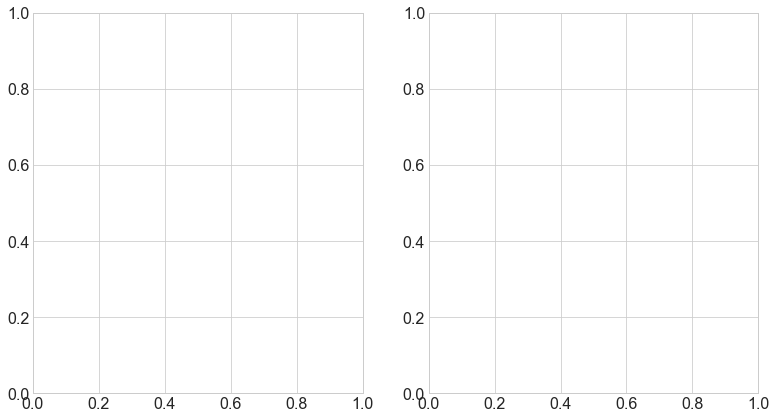

In [162]:
classes = np.unique(y_test.actual)
fig, ax = plt.subplots(nrows=1, ncols=2)
## plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test.actual, log1_pred_proba)
roc_auc = metrics.auc(fpr, tpr)     
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")     
ax.legend(loc="lower right")
ax.grid(True)
## annotate ROC thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax.annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), 
            textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
         next
## plot P-R curve
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test.actual, log1_pred_proba)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax.annotate(np.round(t,1), xy=(recalls[i],precisions[i]), 
                xytext=(recalls[i],precisions[i]), 
                textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
         next
plt.show()

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


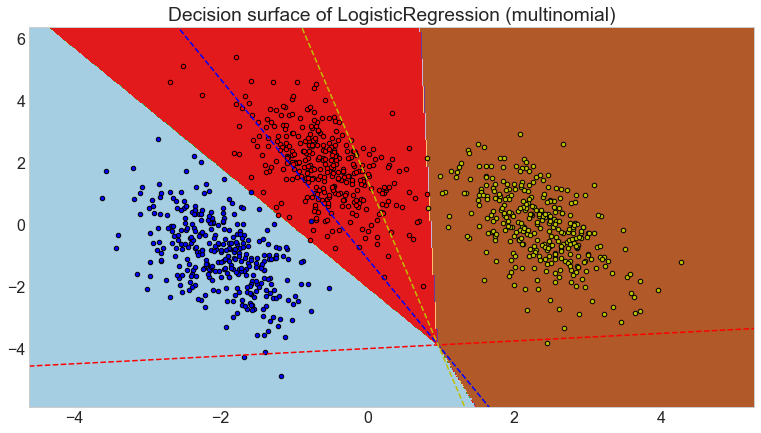

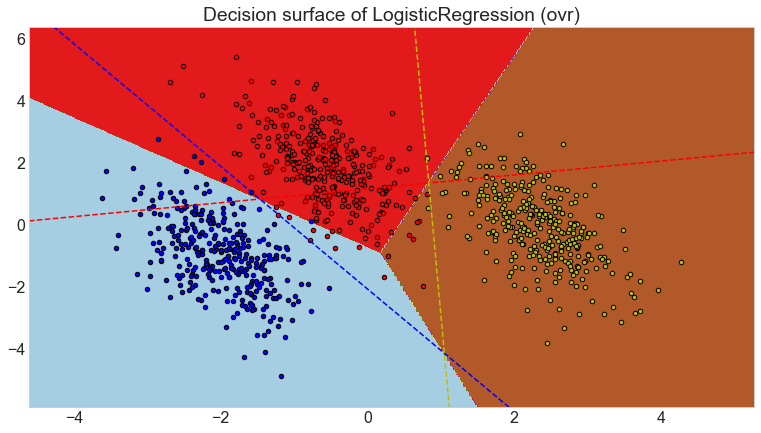

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()